In [2]:
from featureranker.rankers import *
from featureranker.utils import *
from featureranker.plots import *

import pandas as pd
from sklearn.datasets import load_diabetes
import warnings
warnings.filterwarnings('ignore')


# 1 hot encoding 
# forest higher weight
# location --> integer, learned embeddings, natural language

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load your dataset
file_path = 'nhpi-alone_poverty-status_nhpi-below-poverty-past-year_2021_statecounty.csv'
df = pd.read_csv(file_path)

# Remove specified columns
df = df.drop(columns=[
    'nhpi-alone_median-household-income-inflation-adjusted_past-year', 'statecounty'])

# Set the target variable
target = 'nhpi-alone_poverty-status_nhpi-below-poverty-past-year'

# Separate features and target variable
X = df.drop(columns=[target])
y = df[target]
view_data(df)

There are no NaN values in the dataset


In [28]:
rankings = classification_ranking(
    X, y, predict=False, choices=['mi', 'f_test', 'rf'])
scoring = voting(rankings, weights=(0.2, 0.4, 0.4))
plot_rankings(rankings, title='Classification example some methods')
plot_after_voting(scoring, title='Classification example partial ensemble')

Fitting 3 folds for each of 5 candidates, totalling 15 fits


KeyboardInterrupt: 

In [5]:

X_reduced = X.iloc[:, :3]  
print(X_reduced)
print(X_reduced.shape)
rankings = classification_ranking(X_reduced, y, predict=True)

      nhpi-alone_migration_from-out-of-county  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   
...                                       ...   
3216                                      0.0   
3217                                      0.0   
3218                                      0.0   
3219                                      0.0   
3220                                      0.0   

      nhpi-alone_migration_from-out-of-state  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
...                                      ...   
3216                                     0.0   
3217                       

KeyboardInterrupt: 

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.3s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.3s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.3s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.6s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.7s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=10; total time=   0.6s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=120; tot

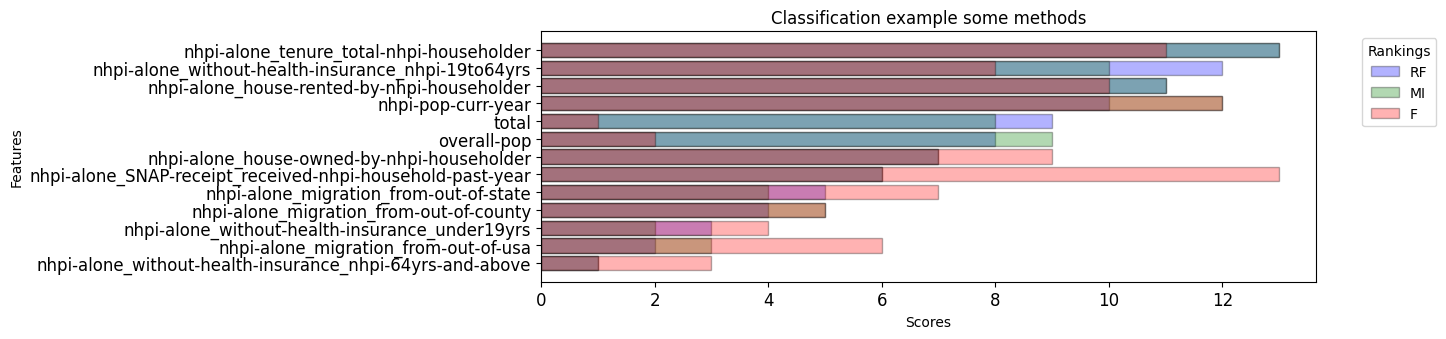

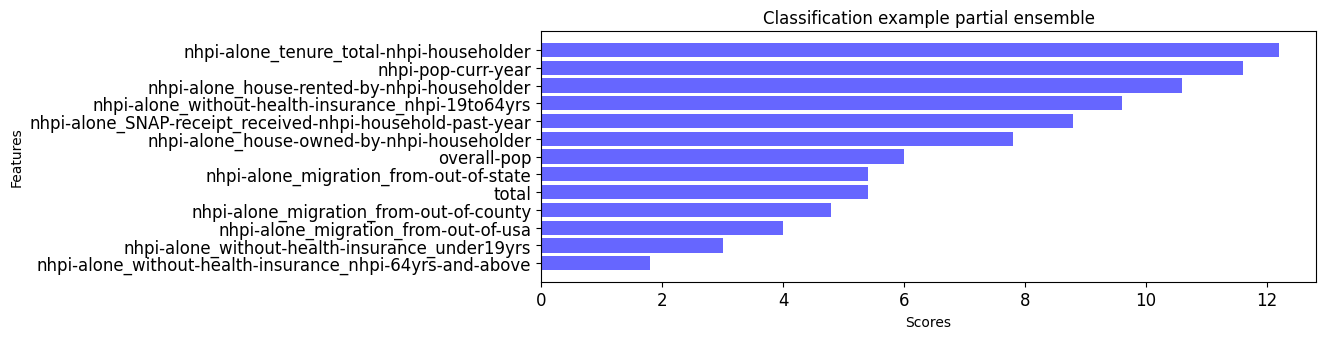

In [45]:
# Try different methods and different weights
rankings = classification_ranking(X, y, predict=False, choices=['mi', 'f_test', 'rf'])
scoring = voting(rankings, weights=(0.2, 0.4, 0.4))
plot_rankings(rankings, title='Classification example some methods')
plot_after_vote(scoring, title='Classification example partial ensemble')

In [7]:
# Try a more thorough / expensive search
rankings = classification_ranking(X, y, cv=5, num_runs=30, scale=20,
                                  num_alphas=1000, predict=True, choices=['rf', 'mi', 'f_test', 'l1'])
scoring = voting(rankings)
plot_rankings(rankings, title='Classification example expensive methods')
plot_after_vote(scoring, title='Classification example expensive ensemble')
# Performance is slighlty better (explains more variance) and more nuanced feature ranking towards the less influential features

NameError: name 'X' is not defined

NameError: name 'elastic_net_regression_ranking' is not defined